# Project B4: Effects of invasive species on native biodivesity

## Intro

Authors: Reelika Pärnpuu, Marta Miia Pärnpuu
Goals: 
1. The general goal is to prevent the spread of invasive species, mostly by analysing
and implementing new invasive species control methods. We will be working on data from
before the control methods have been implemented, but the project will go on to analyse the
same areas after implementation. 
2. A narrower goal would be to find ways for the plant to utilise Python in biology-related data mining, since biology work groups (at least in Tartu University) usually use R instead. To test how well Python can be utilized for biology-related data, we set the goal to look for general correlations in datasets provided for us.

Contents' guide:
1. Imports and cleanup
2. Getting familiar with the data, basic correlation graphs
3. Non-metric MultiDImensional Scaling
4. Biotic Novelty Index

Explain how it is possible to take the code and replicate the sama analysis that the authors have done?

## how to replicate..

# Imports and cleanup

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import pairwise_distances
from sklearn import manifold
import numpy as np
import seaborn as sns

In [2]:
#excel file 1
EEB_samples = pd.ExcelFile('EEB_samples.xlsx') #file
sample = EEB_samples.parse('full_table') #sheet name

#excel file 2
EEB_soil_chemistry = pd.ExcelFile('EEB_soil_chemistry.xlsx')
soil = EEB_soil_chemistry.parse('Sheet1')
soil=soil.iloc[1:] #dropped a row that specified unit of measurement
soil= soil.reset_index(drop=True)

#excel file 3
plant_survey = pd.ExcelFile('Plant_survey_2023_final.xlsx') 
plant = plant_survey.parse('Sheet1')

In [3]:
#since each sample had three repeats, we'll use the average of each triple; 
#following code finds the averages and renames them:
for i in range (1,14):
    for j in range(1,10):
        plant[plant['sample']=='EEB-RJ{}-{}'.format(i, j)]
        if j in range(1, 4):
            plant.loc[plant['sample'] == 'EEB-RJ{}-{}'.format(i, j), 'sample'] = 'INV-{}-R'.format(i)
        if j in range(4, 7): 
            plant.loc[plant['sample'] == 'EEB-RJ{}-{}'.format(i, j), 'sample'] = 'TRANS-{}-R'.format(i)
        if j in range(7, 10): 
            plant.loc[plant['sample'] == 'EEB-RJ{}-{}'.format(i, j), 'sample'] = 'NAT-{}-R'.format(i)
            
            
for i in range (1,12):
    for j in range(1,10):
        plant[plant['sample']=='EEB-SC{}-{}'.format(i, j)]
        if j in range(1, 4):
            plant.loc[plant['sample'] == 'EEB-SC{}-{}'.format(i, j), 'sample'] = 'INV-{}-S'.format(i)
        if j in range(4, 7): 
            plant.loc[plant['sample'] == 'EEB-SC{}-{}'.format(i, j), 'sample'] = 'TRANS-{}-S'.format(i)
        if j in range(7, 10): 
            plant.loc[plant['sample'] == 'EEB-SC{}-{}'.format(i, j), 'sample'] = 'NAT-{}-S'.format(i)
            
            
mean_df = plant.groupby('sample').mean()
#taimed=mean_df.copy()

In [4]:
#we'll create a coordinates' dataframe that only has the values we need
coord_df=sample[['new_code','lat', 'lon']]

#we'll also rename the codes used in the coordinate dataframe, 
#since that dataframe also uses the same codes as the plant dataframe previously did
for i in range (1,14):
    for j in range(1,10):
        coord_df[coord_df['new_code']=='EEB-RJ{}-{}'.format(i, j)]
        if j in range(1, 4):
            coord_df.loc[coord_df['new_code'] == 'EEB-RJ{}-{}'.format(i, j), 'new_code'] = 'INV-{}-R'.format(i)
        if j in range(4, 7): 
            coord_df.loc[coord_df['new_code'] == 'EEB-RJ{}-{}'.format(i, j), 'new_code'] = 'TRANS-{}-R'.format(i)
        if j in range(7, 10): 
            coord_df.loc[coord_df['new_code'] == 'EEB-RJ{}-{}'.format(i, j), 'new_code'] = 'NAT-{}-R'.format(i)
            
            
for i in range (1,12):
    for j in range(1,10):
        coord_df[coord_df['new_code']=='EEB-SC{}-{}'.format(i, j)]
        if j in range(1, 4):
            coord_df.loc[coord_df['new_code'] == 'EEB-SC{}-{}'.format(i, j), 'new_code'] = 'INV-{}-S'.format(i)
        if j in range(4, 7): 
            coord_df.loc[coord_df['new_code'] == 'EEB-SC{}-{}'.format(i, j), 'new_code'] = 'TRANS-{}-S'.format(i)
        if j in range(7, 10): 
            coord_df.loc[coord_df['new_code'] == 'EEB-SC{}-{}'.format(i, j), 'new_code'] = 'NAT-{}-S'.format(i)

coord_new=coord_df.groupby('new_code').mean()

In [5]:
full_plant_cover=mean_df.T.sum()
#we'll view the native and invasive species separetly in most cases
#the two invasive sp in this dataset are Reynoutria japonica (aka Japanese knotweed) and Solidago_canadensis (aka Canadian goldenrod)
invasive_sp=mean_df[['Reynoutria_japonica', 'Solidago_canadensis']]
native_sp=mean_df.drop(['Reynoutria_japonica', 'Solidago_canadensis'],axis=1)

native_cover=native_sp.T.sum()
invasive_cover=invasive_sp.T.sum()
invasive_cover

sample
INV-1-R      86.666667
INV-1-S       0.000000
INV-10-R     71.666667
INV-10-S     87.333333
INV-11-R     91.666667
               ...    
TRANS-7-S    25.000000
TRANS-8-R    25.000000
TRANS-8-S    30.000000
TRANS-9-R    25.000000
TRANS-9-S    11.333333
Length: 72, dtype: float64

## Basic correlation graphs, getting familiar with the data

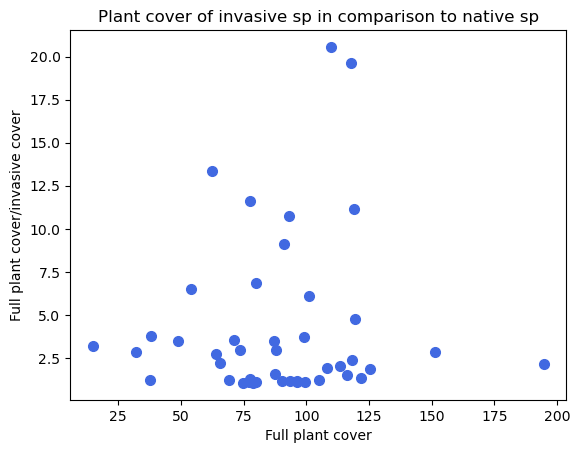

In [6]:
plt.plot(full_plant_cover,full_plant_cover/invasive_cover, marker='o', linestyle='', markersize=7, color='royalblue')
plt.xlabel('Full plant cover')
plt.ylabel('Full plant cover/invasive cover')
plt.title('Plant cover of invasive sp in comparison to native sp')
plt.show()

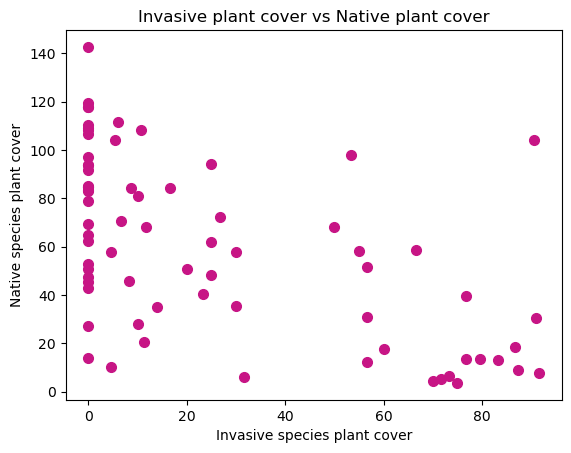

In [7]:
plt.plot(invasive_cover,native_cover, marker='o', linestyle='', markersize=7, color='mediumvioletred')
plt.xlabel('Invasive species plant cover')
plt.ylabel('Native species plant cover')
plt.title('Invasive plant cover vs Native plant cover')
plt.show()

## Non-metric MultiDimensional Scaling

In [8]:
# In order to apply NDMS, we'll need to convert the data matrix (n sample units × p species) into an n x n distance matrix
distances = pairwise_distances(mean_df.values)

# Also converting the distance matrix into a DataFrame for better visualization
distances_df = pd.DataFrame(distances, index=mean_df.index, columns=mean_df.index)

In [9]:
mean_df['liigirikkus'] = mean_df.apply(lambda row: (row != 0).sum(), axis=1)

In [10]:
soil_df=soil[['ala_kood','pHKCl']]
soil_df

,ala_kood,pHKCl
0,EEB-SC2,6.98
1,EEB-SC6,5.98
2,EEB-SC5,6.91
3,EEB-RJ4,6.68
4,EEB-RJ1,6.30
5,EEB-SC1,6.95
6,EEB-RJ3,6.39
7,EEB-SC8,5.62
8,EEB-RJ9,7.23
9,EEB-RJ8,6.46


In [11]:
for index, row in mean_df.iterrows():
    for i in range(1,14):
        if '{}-R'.format(i) in index:
            mean_df.loc[index, 'pH']=soil_df[soil_df['ala_kood']=='EEB-RJ{}'.format(i)].pHKCl.values[0]
        if '{}-S'.format(i) in index:
            mean_df.loc[index, 'pH']=soil_df[soil_df['ala_kood']=='EEB-SC{}'.format(i)].pHKCl.values[0]

In [12]:
for index, row in mean_df.iterrows():
    if 'INV-' in index:
        mean_df.loc[index, 'invadeeritus']=1
    if 'TRANS-' in index:
        mean_df.loc[index, 'invadeeritus']=2
    if 'NAT-' in index:
        mean_df.loc[index, 'invadeeritus']=3

In [13]:
suur_tabel=pd.concat([mean_df,coord_new], axis=1)
soil.rename(columns={'P-AL': 'P_AL', 'K-AL': 'K_AL', 'Ca-AL': 'Ca_AL', 'Mg-AL': 'Mg_AL', 'N -Kjeldahl': 'N_Kjel', 'C-Tjurin': 'C_Tjur'}, inplace=True)

for index, row in suur_tabel.iterrows():
    for i in range(1,14):
        if '{}-R'.format(i) in index:
            suur_tabel.loc[index, 'P_AL']=soil[soil['ala_kood']=='EEB-RJ{}'.format(i)].P_AL.values[0]
            suur_tabel.loc[index, 'K_AL']=soil[soil['ala_kood']=='EEB-RJ{}'.format(i)].K_AL.values[0]
            suur_tabel.loc[index, 'Ca_AL']=soil[soil['ala_kood']=='EEB-RJ{}'.format(i)].Ca_AL.values[0]
            suur_tabel.loc[index, 'Mg_AL']=soil[soil['ala_kood']=='EEB-RJ{}'.format(i)].Mg_AL.values[0]
            suur_tabel.loc[index, 'N_Kjel']=soil[soil['ala_kood']=='EEB-RJ{}'.format(i)].N_Kjel.values[0]
            suur_tabel.loc[index, 'C_Tjur']=soil[soil['ala_kood']=='EEB-RJ{}'.format(i)].C_Tjur.values[0]
        if '{}-S'.format(i) in index:
            suur_tabel.loc[index, 'P_AL']=soil[soil['ala_kood']=='EEB-SC{}'.format(i)].P_AL.values[0]
            suur_tabel.loc[index, 'K_AL']=soil[soil['ala_kood']=='EEB-SC{}'.format(i)].K_AL.values[0]
            suur_tabel.loc[index, 'Ca_AL']=soil[soil['ala_kood']=='EEB-SC{}'.format(i)].Ca_AL.values[0]
            suur_tabel.loc[index, 'Mg_AL']=soil[soil['ala_kood']=='EEB-SC{}'.format(i)].Mg_AL.values[0]
            suur_tabel.loc[index, 'N_Kjel']=soil[soil['ala_kood']=='EEB-SC{}'.format(i)].N_Kjel.values[0]
            suur_tabel.loc[index, 'C_Tjur']=soil[soil['ala_kood']=='EEB-SC{}'.format(i)].C_Tjur.values[0]

In [14]:
suur_tabel[['invadeeritus','lat','lon']]
species_cols = [col for col in suur_tabel.columns if col not in ['liigirikkus',
 'pH',
 'invadeeritus',
 'lat',
 'lon',
 'P_AL',
 'K_AL',
 'Ca_AL',
 'Mg_AL',
 'N_Kjel',
 'C_Tjur']]

mean_coverage_by_area = suur_tabel.groupby('invadeeritus')[species_cols].mean()

# Plot the mean coverage for each species in each AreaType
#plt.figure(figsize=(20, 10))
#sns.heatmap(mean_coverage_by_area, cmap='YlGnBu')
#plt.title('Mean Coverage of Each Species in Each AreaType')
#plt.ylabel('AreaType')
#plt.xlabel('Species')
#plt.show()

In [15]:
suur=suur_tabel.copy()

suur.loc[:, 'invasive_cover'] =invasive_cover.values
suur.loc[:, 'native_cover'] = native_cover.values
suur.loc[:, 'full_plant_cover'] = full_plant_cover.values

In [16]:


tulbad=['liigirikkus', 'pH', 'invadeeritus', 'lat', 'lon', 'P_AL', 'K_AL', 'Ca_AL', 'Mg_AL',
       'N_Kjel', 'C_Tjur']

väiksem_asi=suur_tabel[tulbad]


v_dist = pairwise_distances(väiksem_asi.values)

# Convert the distances matrix to a DataFrame for better visualization
v_dist_df = pd.DataFrame(v_dist, index=väiksem_asi.index, columns=väiksem_asi.index)
v_dist_df

,INV-1-R,INV-1-S,INV-10-R,INV-10-S,INV-11-R,INV-11-S,INV-12-R,INV-13-R,INV-2-R,INV-2-S,...,TRANS-5-R,TRANS-5-S,TRANS-6-R,TRANS-6-S,TRANS-7-R,TRANS-7-S,TRANS-8-R,TRANS-8-S,TRANS-9-R,TRANS-9-S
INV-1-R,0.000000,41512.350089,56823.267651,43512.577258,49464.300720,639.131250,2057.513556,10371.357093,10079.186045,7234.684051,...,291.056425,979.947252,9549.255888,1707.256173,563.429319,9845.518308,159.407835,1469.295085,42108.971742,19568.412771
INV-1-S,41512.350089,0.000000,15314.173421,2065.891119,8032.216568,42144.090031,39483.526031,31218.807537,31459.699652,34282.654938,...,41354.411215,40626.444586,32008.225336,43218.644950,42049.693964,31667.849582,41604.168963,42975.749957,758.600676,22401.522317
INV-10-R,56823.267651,15314.173421,0.000000,13314.422483,7431.846189,57454.543066,54792.009884,46515.547184,46764.186319,49592.442575,...,56665.150101,55934.907754,47310.789002,58529.518783,57360.723844,46979.152237,56914.952838,58287.155372,14735.672703,37601.796881
INV-10-S,43512.577258,2065.891119,13314.422483,0.000000,5983.715947,44143.505199,41479.675624,33201.564465,33450.507637,36280.669554,...,43354.320793,42622.085032,33996.635134,45218.722514,44050.177866,33668.816972,43604.274292,44976.588513,1701.069497,24322.973345
INV-11-R,49464.300720,8032.216568,7431.846189,5983.715947,0.000000,50094.540867,47427.725039,39137.570420,39394.608227,42231.045898,...,49305.918250,48568.348264,39937.425190,51170.126332,50002.333676,39622.638707,49556.215174,50928.409477,7533.683105,30182.214470
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TRANS-7-S,9845.518308,31667.849582,46979.152237,33668.816972,39622.638707,10477.529181,7821.906852,1183.675873,659.787563,2620.761066,...,9688.384123,8964.063507,844.631441,11551.615055,10383.206415,0.000000,9937.811733,11308.259479,32266.153899,9955.338047
TRANS-8-R,159.407835,41604.168963,56914.952838,43604.274292,49556.215174,546.062685,2146.516887,10460.417864,10170.621864,7326.299326,...,285.245605,1069.402908,9639.393766,1616.385987,450.225810,9937.811733,0.000000,1379.622291,42200.442716,19660.427655
TRANS-8-S,1469.295085,42975.749957,58287.155372,44976.588513,50928.409477,849.408581,3516.405126,11832.566144,11543.309294,8697.543708,...,1632.837181,2392.302181,11010.432908,268.501734,935.455989,11308.259479,1379.622291,0.000000,43572.050744,21020.283262
TRANS-9-R,42108.971742,758.600676,14735.672703,1701.069497,7533.683105,42740.985000,40083.334684,31829.275459,32065.238181,34882.660956,...,41951.024692,41227.647156,32615.950854,43815.068317,42645.715786,32266.153899,42200.442716,43572.050744,0.000000,23055.813047


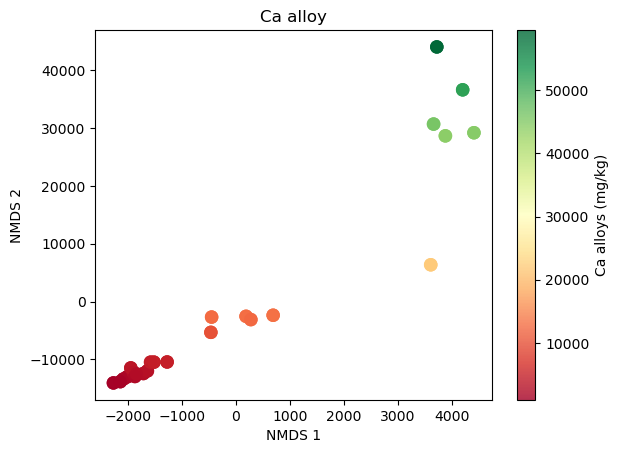

In [17]:
#plt.figure(figsize=(10,6))
#plt.figure(dpi=110)
mds = manifold.MDS(n_components=2, dissimilarity='precomputed',normalized_stress='auto')
emb = mds.fit_transform(v_dist_df)

värv=väiksem_asi.Ca_AL.values

plt.scatter(emb[:, 0], emb[:, 1],c=värv, cmap='RdYlGn',s=75,alpha=0.8)
plt.xlabel('NMDS 1')
plt.ylabel('NMDS 2')
plt.title('Ca alloy')
plt.colorbar(label='Ca alloys (mg/kg)')
#plt.savefig('skeem.pdf',dpi=300,bbox_inches='tight')
plt.show()

##

#from matplotlib import pyplot as pyplot


# liigirikkus

In [18]:
mean_df['liigirikkus'] = mean_df.apply(lambda row: (row != 0).sum(), axis=1)


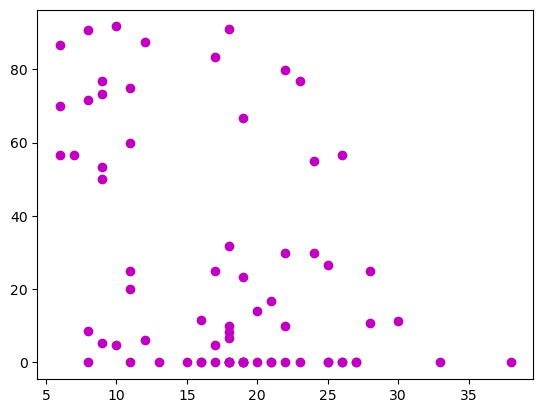

In [19]:
plt.plot(mean_df.liigirikkus,invasive_cover,'mo')
plt.show()

In [20]:
mean_df.columns

Index(['Reynoutria_japonica', 'Solidago_canadensis', 'Aegopodium_podagraria',
       'Ranunculus_auricomus', 'Alopecurus_pratensis', 'Elymus_repens',
       'Agrostis_capillaris', 'Festuca_rubra', 'Cirsium_arvensis',
       'Taraxacum_officinale',
       ...
       'Allium_scorodoprasum', 'Veronica_teucrium', 'Agrimonia_eupatoria',
       'Plantago_media', 'Sonchus_arvensis', 'Prunus_domestica', 'Salix_alba',
       'liigirikkus', 'pH', 'invadeeritus'],
      dtype='object', length=224)

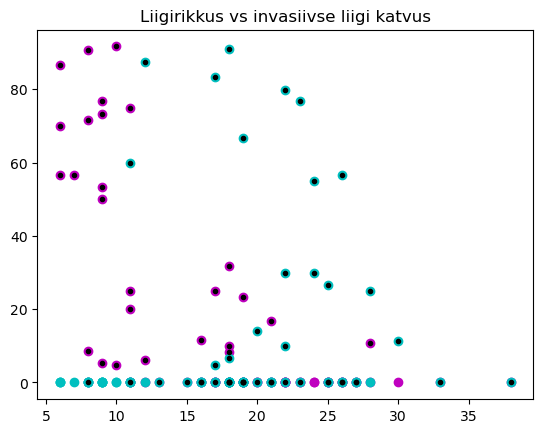

In [21]:
plt.plot(mean_df.liigirikkus,mean_df.Reynoutria_japonica,'mo')
plt.plot(mean_df.liigirikkus,mean_df.Solidago_canadensis,'co')
plt.plot(mean_df.liigirikkus,invasive_cover,'k.')
plt.title('Liigirikkus vs invasiivse liigi katvus')
plt.show()

# soil

In [22]:
soil.columns

Index(['ala_kood', 'Proovi nimetus', 'Nr.', 'Jrk. nr.', 'pHKCl', 'P_AL',
       'K_AL', 'Ca_AL', 'Mg_AL', 'N_Kjel', 'C_Tjur'],
      dtype='object')

In [23]:
soil_df=soil[['ala_kood','pHKCl']]
soil_df

,ala_kood,pHKCl
0,EEB-SC2,6.98
1,EEB-SC6,5.98
2,EEB-SC5,6.91
3,EEB-RJ4,6.68
4,EEB-RJ1,6.30
5,EEB-SC1,6.95
6,EEB-RJ3,6.39
7,EEB-SC8,5.62
8,EEB-RJ9,7.23
9,EEB-RJ8,6.46


In [24]:
soil_df[soil_df['ala_kood']=='EEB-RJ{}'.format(3)].pHKCl.values[0]

6.39

In [25]:
for index, row in mean_df.iterrows():
    for i in range(1,14):
        if '{}-R'.format(i) in index:
            mean_df.loc[index, 'pH']=soil_df[soil_df['ala_kood']=='EEB-RJ{}'.format(i)].pHKCl.values[0]
        if '{}-S'.format(i) in index:
            mean_df.loc[index, 'pH']=soil_df[soil_df['ala_kood']=='EEB-SC{}'.format(i)].pHKCl.values[0]

In [26]:
soil_df

,ala_kood,pHKCl
0,EEB-SC2,6.98
1,EEB-SC6,5.98
2,EEB-SC5,6.91
3,EEB-RJ4,6.68
4,EEB-RJ1,6.30
5,EEB-SC1,6.95
6,EEB-RJ3,6.39
7,EEB-SC8,5.62
8,EEB-RJ9,7.23
9,EEB-RJ8,6.46


In [27]:
mean_df

,Reynoutria_japonica,Solidago_canadensis,Aegopodium_podagraria,Ranunculus_auricomus,Alopecurus_pratensis,Elymus_repens,Agrostis_capillaris,Festuca_rubra,Cirsium_arvensis,Taraxacum_officinale,...,Allium_scorodoprasum,Veronica_teucrium,Agrimonia_eupatoria,Plantago_media,Sonchus_arvensis,Prunus_domestica,Salix_alba,liigirikkus,pH,invadeeritus
sample,,,,,,,,,,,,,,,,,,,,,
INV-1-R,86.666667,0.000000,18.333333,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,6,6.30,1.0
INV-1-S,0.000000,0.000000,10.666667,0.000000,0.000000,0.166667,0.000000,16.666667,0.0,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,33,6.95,1.0
INV-10-R,71.666667,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,8,7.15,1.0
INV-10-S,0.000000,87.333333,0.000000,0.000000,0.000000,0.666667,0.000000,0.333333,0.0,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,12,7.11,1.0
INV-11-R,91.666667,0.000000,2.666667,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.333333,...,0.000000,0.000000,0.000000,0.000000,0.0,0.333333,0.0,10,7.16,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TRANS-7-S,0.000000,25.000000,0.000000,0.000000,0.000000,4.333333,2.333333,5.000000,0.0,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,28,7.29,2.0
TRANS-8-R,25.000000,0.000000,13.333333,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,17,6.46,2.0
TRANS-8-S,0.000000,30.000000,30.000000,1.666667,0.333333,1.666667,0.000000,0.000000,0.0,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,22,5.62,2.0


In [28]:
# for index, row in mean_df.iterrows():
#     if 'INV-' in index:
#         mean_df.loc[index, 'invadeeritus']='INV'
#     if 'TRANS-' in index:
#         mean_df.loc[index, 'invadeeritus']='TRANS'
#     if 'NAT-' in index:
#         mean_df.loc[index, 'invadeeritus']='NAT'

In [29]:
for index, row in mean_df.iterrows():
    if 'INV-' in index:
        mean_df.loc[index, 'invadeeritus']=1
    if 'TRANS-' in index:
        mean_df.loc[index, 'invadeeritus']=2
    if 'NAT-' in index:
        mean_df.loc[index, 'invadeeritus']=3

In [30]:
mean_df

,Reynoutria_japonica,Solidago_canadensis,Aegopodium_podagraria,Ranunculus_auricomus,Alopecurus_pratensis,Elymus_repens,Agrostis_capillaris,Festuca_rubra,Cirsium_arvensis,Taraxacum_officinale,...,Allium_scorodoprasum,Veronica_teucrium,Agrimonia_eupatoria,Plantago_media,Sonchus_arvensis,Prunus_domestica,Salix_alba,liigirikkus,pH,invadeeritus
sample,,,,,,,,,,,,,,,,,,,,,
INV-1-R,86.666667,0.000000,18.333333,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,6,6.30,1.0
INV-1-S,0.000000,0.000000,10.666667,0.000000,0.000000,0.166667,0.000000,16.666667,0.0,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,33,6.95,1.0
INV-10-R,71.666667,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,8,7.15,1.0
INV-10-S,0.000000,87.333333,0.000000,0.000000,0.000000,0.666667,0.000000,0.333333,0.0,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,12,7.11,1.0
INV-11-R,91.666667,0.000000,2.666667,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.333333,...,0.000000,0.000000,0.000000,0.000000,0.0,0.333333,0.0,10,7.16,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TRANS-7-S,0.000000,25.000000,0.000000,0.000000,0.000000,4.333333,2.333333,5.000000,0.0,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,28,7.29,2.0
TRANS-8-R,25.000000,0.000000,13.333333,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,17,6.46,2.0
TRANS-8-S,0.000000,30.000000,30.000000,1.666667,0.333333,1.666667,0.000000,0.000000,0.0,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,22,5.62,2.0


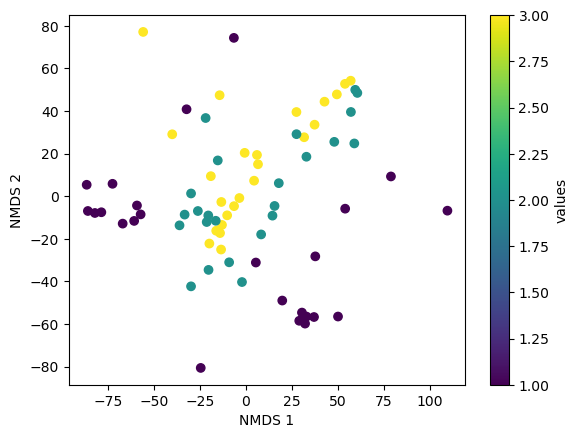

In [31]:
from sklearn import manifold
mds = manifold.MDS(n_components=2, dissimilarity='precomputed',normalized_stress="auto") #normalized_stress=False
embedding = mds.fit_transform(distances_df)
invadeeritus=mean_df.invadeeritus.values

plt.scatter(embedding[:, 0], embedding[:, 1],c=invadeeritus, cmap='viridis')
plt.xlabel('NMDS 1')
plt.ylabel('NMDS 2')
plt.colorbar(label='values')

plt.show()

- 1= INV
- 2=TRANS
- 3=NAT

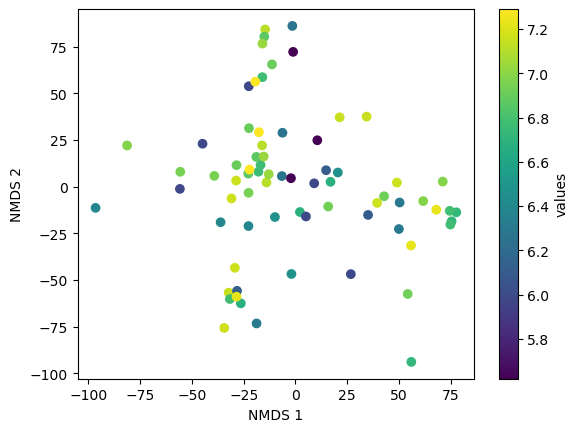

In [32]:
from sklearn import manifold
mds = manifold.MDS(n_components=2, dissimilarity='precomputed',normalized_stress="auto")
embedding = mds.fit_transform(distances_df)
pH=mean_df.pH.values

plt.scatter(embedding[:, 0], embedding[:, 1],c=pH, cmap='viridis')
plt.xlabel('NMDS 1')
plt.ylabel('NMDS 2')
plt.colorbar(label='values')
plt.show()
#stress valued vaadata???
# värvid panna invaded, mitte invaded, transitional

In [33]:
distances_df

sample,INV-1-R,INV-1-S,INV-10-R,INV-10-S,INV-11-R,INV-11-S,INV-12-R,INV-13-R,INV-2-R,INV-2-S,...,TRANS-5-R,TRANS-5-S,TRANS-6-R,TRANS-6-S,TRANS-7-R,TRANS-7-S,TRANS-8-R,TRANS-8-S,TRANS-9-R,TRANS-9-S
sample,,,,,,,,,,,,,,,,,,,,,
INV-1-R,0.000000,102.598868,24.088379,124.521417,16.863010,125.939249,81.503408,20.643132,36.628010,117.293909,...,85.861646,95.569783,81.650509,98.988916,69.200393,93.636561,63.276510,93.198265,90.939082,89.383848
INV-1-S,102.598868,0.000000,90.695155,103.524823,106.945209,106.150574,138.237919,93.111343,79.918535,95.698891,...,74.370506,61.037784,64.680840,70.824117,62.553533,61.742746,61.271255,66.091267,95.548998,56.254876
INV-10-R,24.088379,90.695155,0.000000,112.992625,20.207259,116.720940,101.602165,5.744563,18.697148,107.265248,...,85.030550,80.259302,74.961472,84.301707,60.929832,77.947276,49.843087,84.225227,97.183103,72.910143
INV-10-S,124.521417,103.524823,112.992625,0.000000,126.660965,15.151091,160.698130,115.265394,104.761236,118.358448,...,106.782619,65.345237,97.746270,91.896681,95.272708,64.831405,92.495646,65.970532,124.596683,76.401716
INV-11-R,16.863010,106.945209,20.207259,126.660965,0.000000,129.718070,97.136788,17.146428,36.762375,121.283186,...,98.543702,98.536513,91.061640,101.852835,77.675250,96.664943,68.494931,100.989548,106.104770,92.635486
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TRANS-7-S,93.636561,61.742746,77.947276,64.831405,96.664943,69.539757,138.152492,80.921773,65.090749,84.556030,...,68.007965,23.414146,52.995807,48.491695,48.657533,0.000000,43.582616,36.269056,93.746111,21.758779
TRANS-8-R,63.276510,61.271255,49.843087,92.495646,68.494931,95.147254,109.331301,53.114133,37.890559,83.696210,...,50.425688,47.580341,37.360109,54.113050,24.260164,43.582616,0.000000,45.995169,73.019023,33.349996
TRANS-8-S,93.198265,66.091267,84.225227,65.970532,100.989548,64.755094,118.845371,86.524242,72.493103,86.923657,...,45.550643,39.568506,40.398020,58.983990,41.048752,36.269056,45.995169,0.000000,68.574372,37.196177


In [34]:
#tulbad

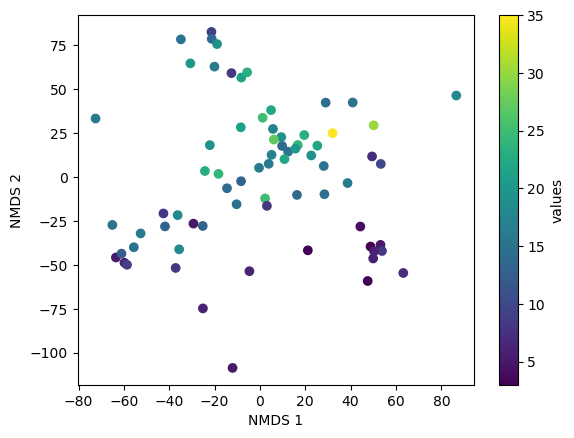

In [35]:
from sklearn import manifold
mds = manifold.MDS(n_components=2, dissimilarity='precomputed',normalized_stress="auto")
embedding = mds.fit_transform(distances_df)
pH=suur_tabel.liigirikkus.values

plt.scatter(embedding[:, 0], embedding[:, 1],c=pH, cmap='viridis')
plt.xlabel('NMDS 1')
plt.ylabel('NMDS 2')
plt.colorbar(label='values')
plt.show()

In [36]:
#!pip install folium

In [37]:
sample

,new_code,project,plant_sp,sampling_area(on_bag),treatment,sampling_area_nr,gradient,grad_nr,plant_nr,expert,area,lat,lon,status _dna_extraction
0,EEB-RJ1-1,EEB,RJ,Mustvee,control,1,invaded,1,1,Kadri,E,58.858114,26.931854,NaN
1,EEB-RJ1-2,EEB,RJ,Mustvee,control,1,invaded,2,2,Kadri,E,58.858114,26.931854,NaN
2,EEB-RJ1-3,EEB,RJ,Mustvee,control,1,invaded,3,3,Kadri,E,58.858114,26.931854,NaN
3,EEB-RJ1-4,EEB,RJ,Mustvee,control,1,transitional,1,4,Kadri,E,58.858114,26.931854,NaN
4,EEB-RJ1-5,EEB,RJ,Mustvee,control,1,transitional,2,5,Kadri,E,58.858114,26.931854,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
211,EEB-SC11-5,EEB,SC,Kaimri,mown,11,transitional,2,5,Oliver,W,58.060173,22.207555,NaN
212,EEB-SC11-6,EEB,SC,Kaimri,mown,11,transitional,3,6,Oliver,W,58.060173,22.207555,NaN
213,EEB-SC11-7,EEB,SC,Kaimri,mown,11,natural,1,7,Oliver,W,58.060173,22.207555,NaN
214,EEB-SC11-8,EEB,SC,Kaimri,mown,11,natural,2,8,Oliver,W,58.060173,22.207555,NaN


In [38]:
mean_df

,Reynoutria_japonica,Solidago_canadensis,Aegopodium_podagraria,Ranunculus_auricomus,Alopecurus_pratensis,Elymus_repens,Agrostis_capillaris,Festuca_rubra,Cirsium_arvensis,Taraxacum_officinale,...,Allium_scorodoprasum,Veronica_teucrium,Agrimonia_eupatoria,Plantago_media,Sonchus_arvensis,Prunus_domestica,Salix_alba,liigirikkus,pH,invadeeritus
sample,,,,,,,,,,,,,,,,,,,,,
INV-1-R,86.666667,0.000000,18.333333,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,6,6.30,1.0
INV-1-S,0.000000,0.000000,10.666667,0.000000,0.000000,0.166667,0.000000,16.666667,0.0,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,33,6.95,1.0
INV-10-R,71.666667,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,8,7.15,1.0
INV-10-S,0.000000,87.333333,0.000000,0.000000,0.000000,0.666667,0.000000,0.333333,0.0,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,12,7.11,1.0
INV-11-R,91.666667,0.000000,2.666667,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.333333,...,0.000000,0.000000,0.000000,0.000000,0.0,0.333333,0.0,10,7.16,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TRANS-7-S,0.000000,25.000000,0.000000,0.000000,0.000000,4.333333,2.333333,5.000000,0.0,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,28,7.29,2.0
TRANS-8-R,25.000000,0.000000,13.333333,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,17,6.46,2.0
TRANS-8-S,0.000000,30.000000,30.000000,1.666667,0.333333,1.666667,0.000000,0.000000,0.0,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,22,5.62,2.0


In [39]:
coord_new.columns

Index(['lat', 'lon'], dtype='object')

In [40]:
coord_new

,lat,lon
new_code,,
INV-1-R,58.858114,26.931854
INV-1-S,58.777722,26.309980
INV-10-R,58.278045,22.500830
INV-10-S,58.255485,22.473204
INV-11-R,58.259786,22.512229
...,...,...
TRANS-7-S,59.385577,24.728316
TRANS-8-R,59.434088,24.685018
TRANS-8-S,59.434088,24.685018


# #graafik 2

In [41]:
import folium

# Create a map centered at an initial location
initial_latitude=58.595272
initial_longitude=25.013607
map = folium.Map(location=[initial_latitude, initial_longitude], zoom_start=7)

# Add points to the map
for index, row in coord_new.iterrows():
    folium.CircleMarker([row['lat'], row['lon']], color="darkblue",
        radius=10,
        fill=True,
        fill_color="cadetblue",
        fill_opacity=0.6,
        ).add_to(map)
# Display the map
map
map.save('map.html')

In [42]:
mean_df.columns

Index(['Reynoutria_japonica', 'Solidago_canadensis', 'Aegopodium_podagraria',
       'Ranunculus_auricomus', 'Alopecurus_pratensis', 'Elymus_repens',
       'Agrostis_capillaris', 'Festuca_rubra', 'Cirsium_arvensis',
       'Taraxacum_officinale',
       ...
       'Allium_scorodoprasum', 'Veronica_teucrium', 'Agrimonia_eupatoria',
       'Plantago_media', 'Sonchus_arvensis', 'Prunus_domestica', 'Salix_alba',
       'liigirikkus', 'pH', 'invadeeritus'],
      dtype='object', length=224)

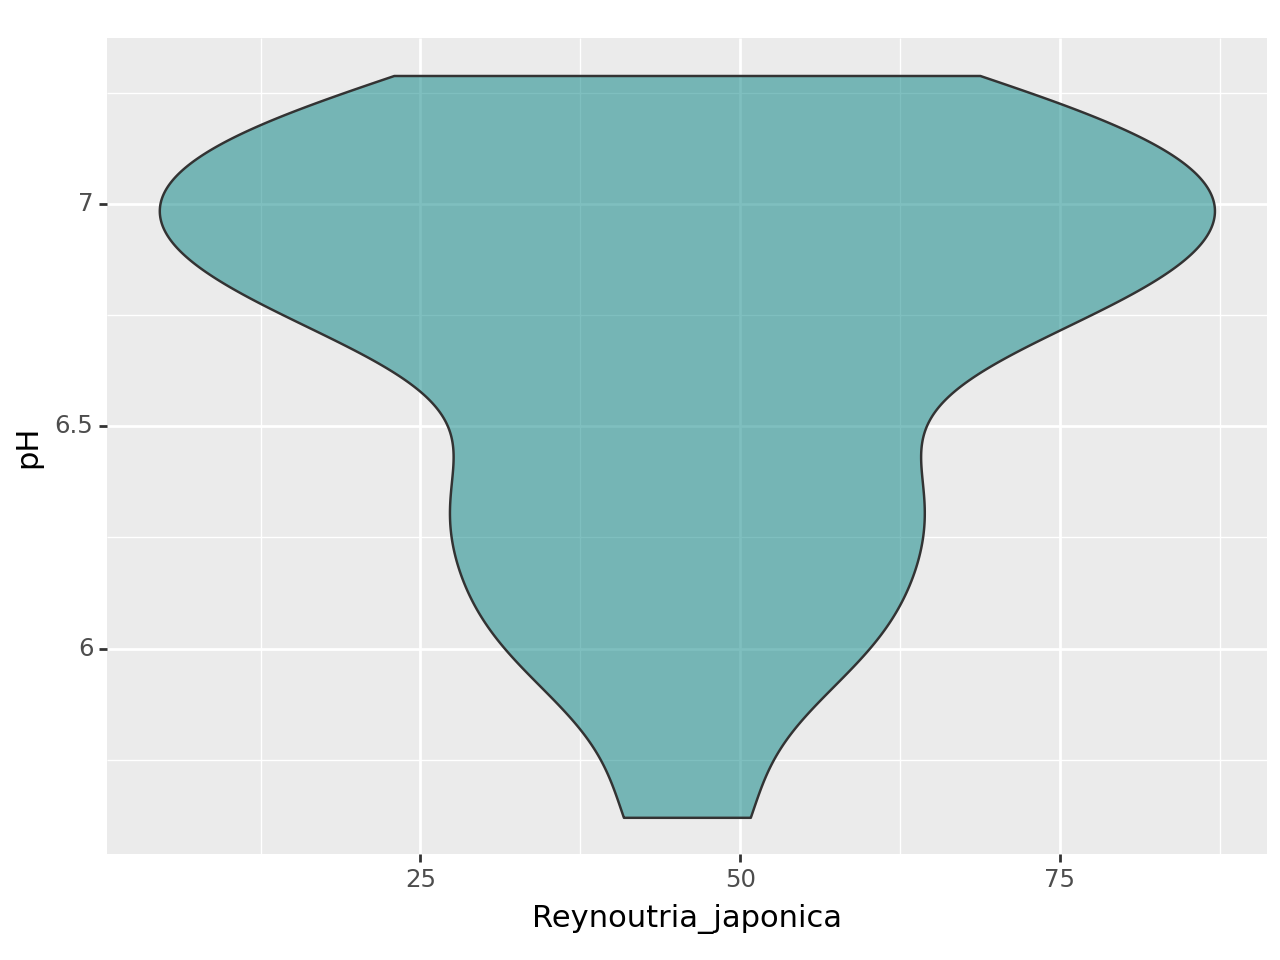

<Figure Size: (640 x 480)>

In [43]:
import plotnine as p9

(p9.ggplot(
    data = mean_df, 
    mapping = p9.aes(x = 'Reynoutria_japonica', y = 'pH')
) + 
    p9.geom_violin(fill='teal',alpha=0.5))


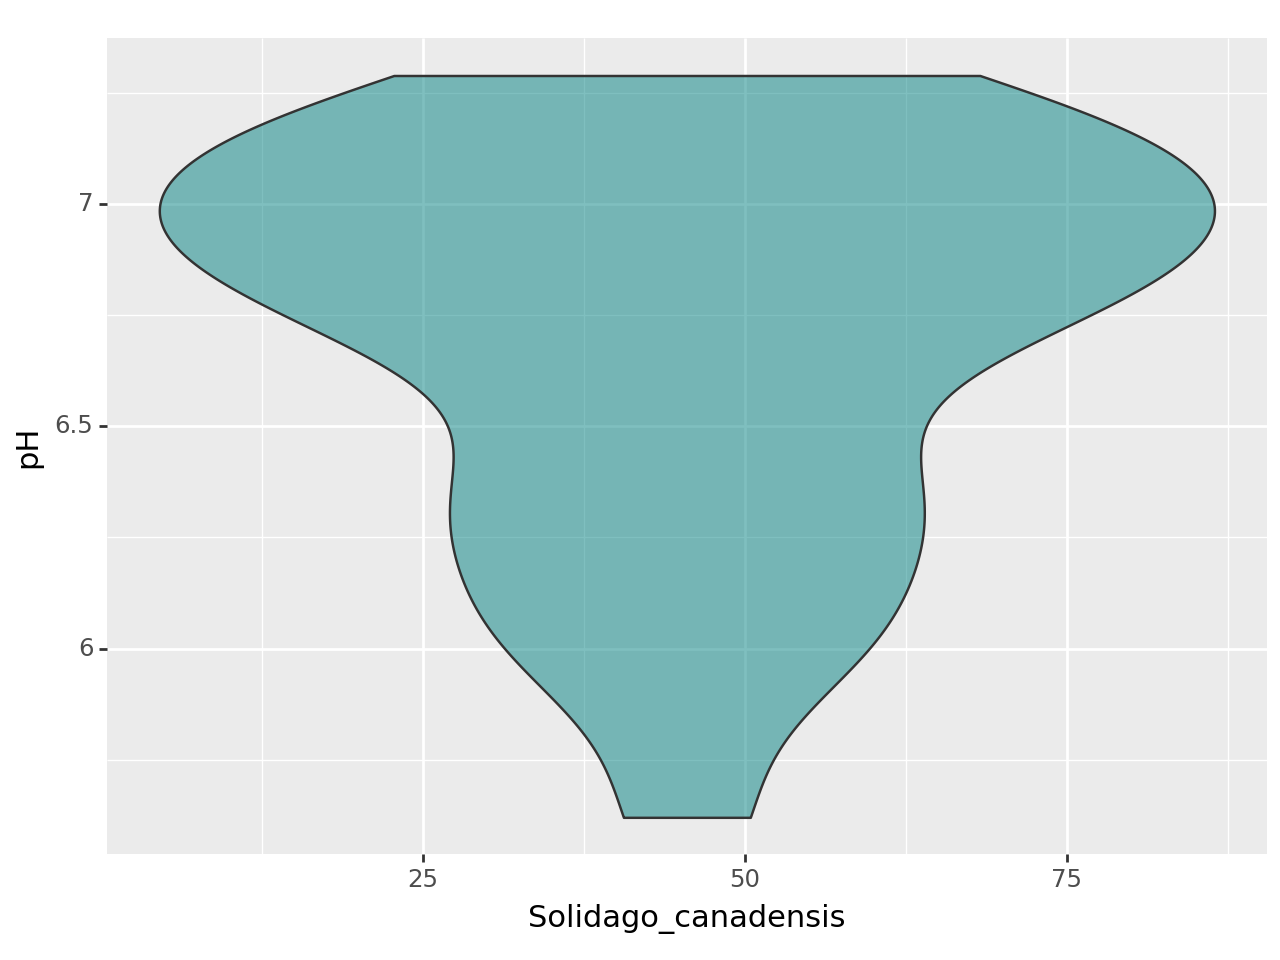

<Figure Size: (640 x 480)>

In [44]:
(p9.ggplot(
    data = mean_df, 
    mapping = p9.aes(x = 'Solidago_canadensis', y = 'pH')
) + 
    p9.geom_violin(fill='teal',alpha=0.5))


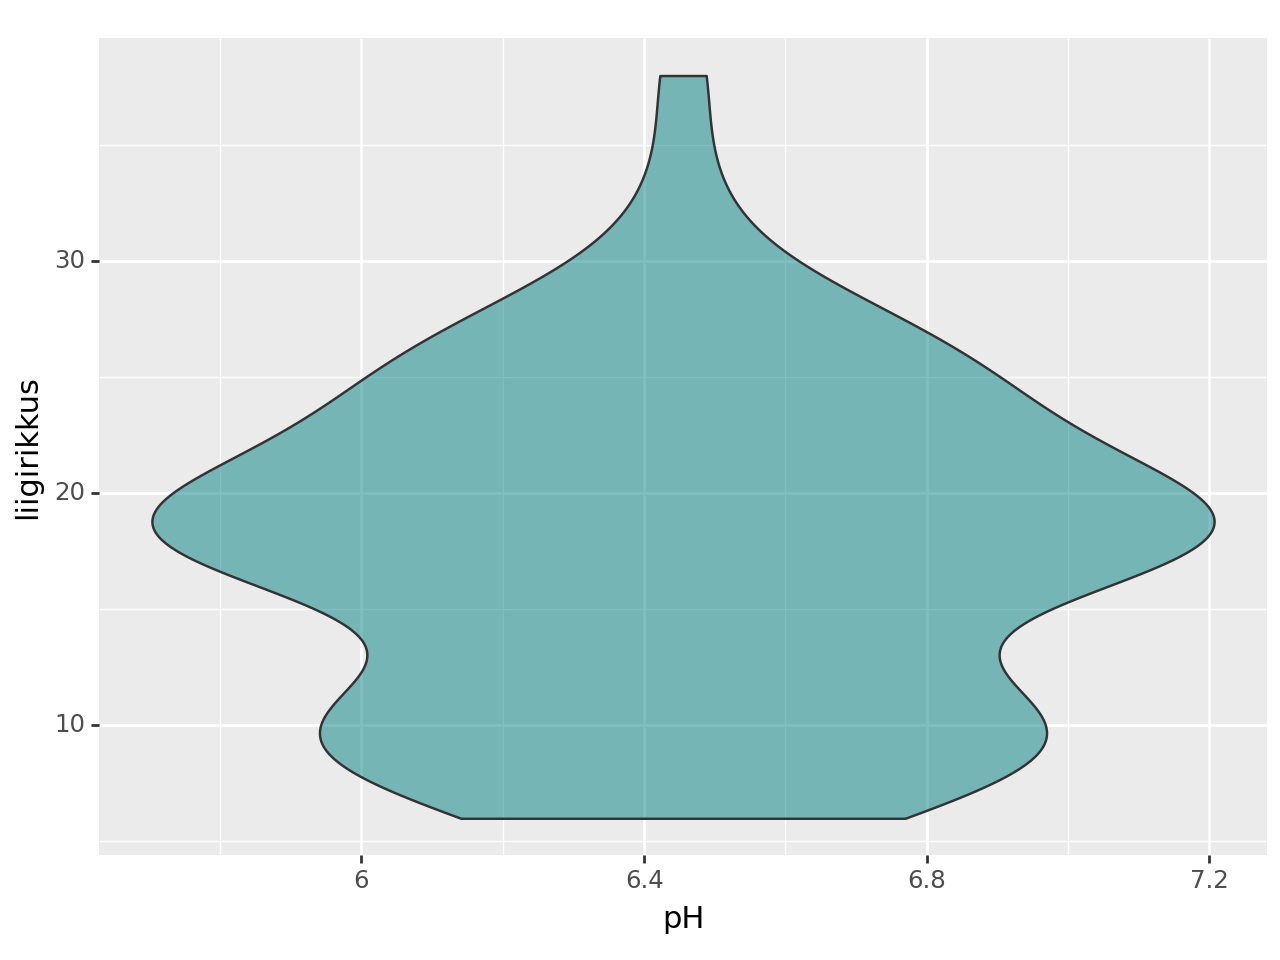

<Figure Size: (640 x 480)>

In [45]:
(p9.ggplot(
    data = mean_df, 
    mapping = p9.aes(y = 'liigirikkus', x = 'pH')
) + 
    p9.geom_violin(fill='teal',alpha=0.5))


C:\Users\mmpuu\anaconda3\Lib\site-packages\plotnine\stats\smoothers.py:330: PlotnineWarning: Confidence intervals are not yet implemented for lowess smoothings.


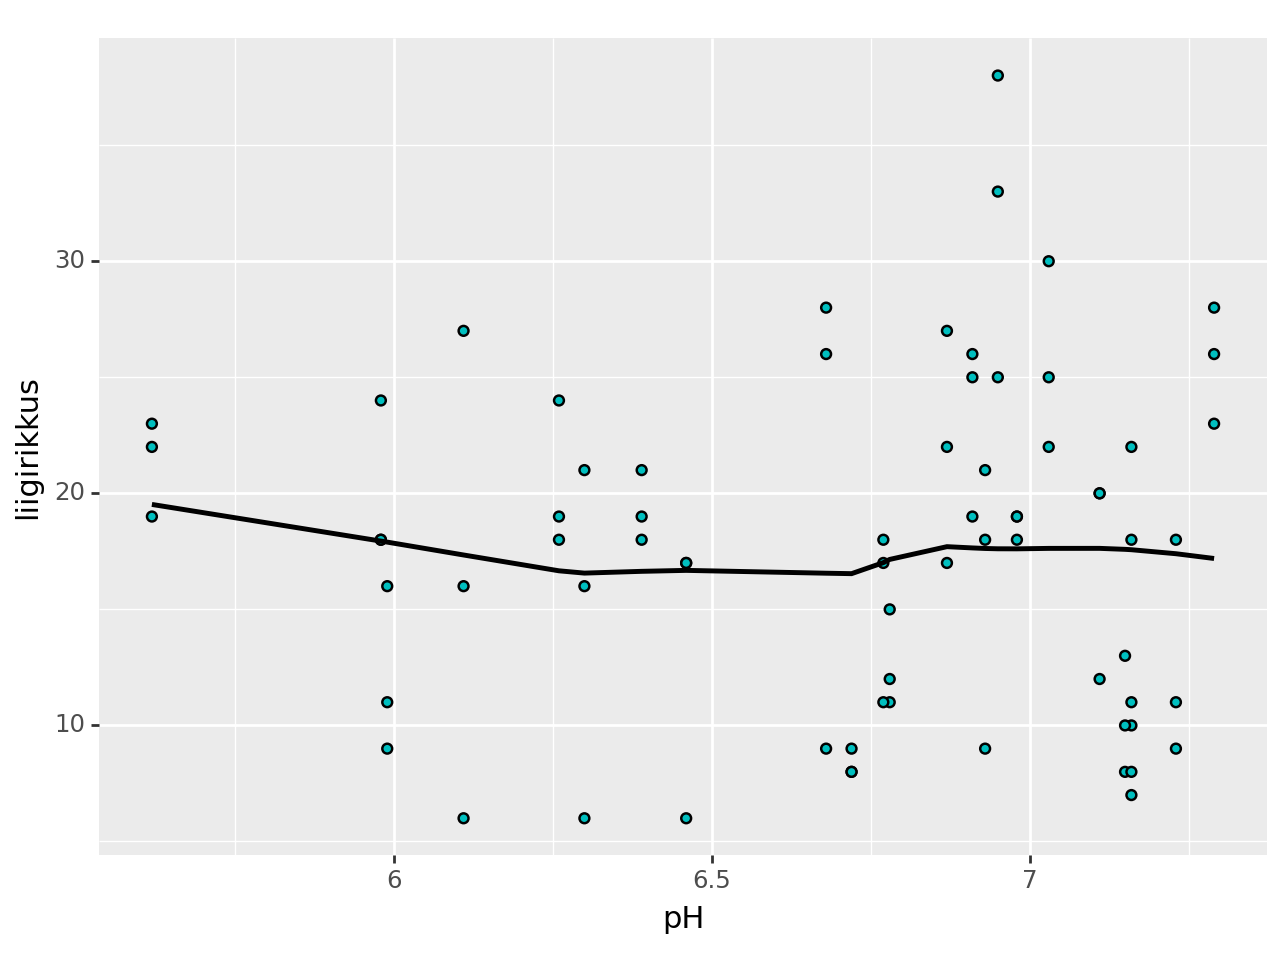

<Figure Size: (640 x 480)>

In [46]:
(
p9.ggplot(
    data = mean_df, 
    mapping = p9.aes(y = 'liigirikkus', x = 'pH')
) + 
    p9.geom_point(fill='c')
    +p9.geom_smooth(fill='m')
)

C:\Users\mmpuu\anaconda3\Lib\site-packages\plotnine\stats\smoothers.py:330: PlotnineWarning: Confidence intervals are not yet implemented for lowess smoothings.


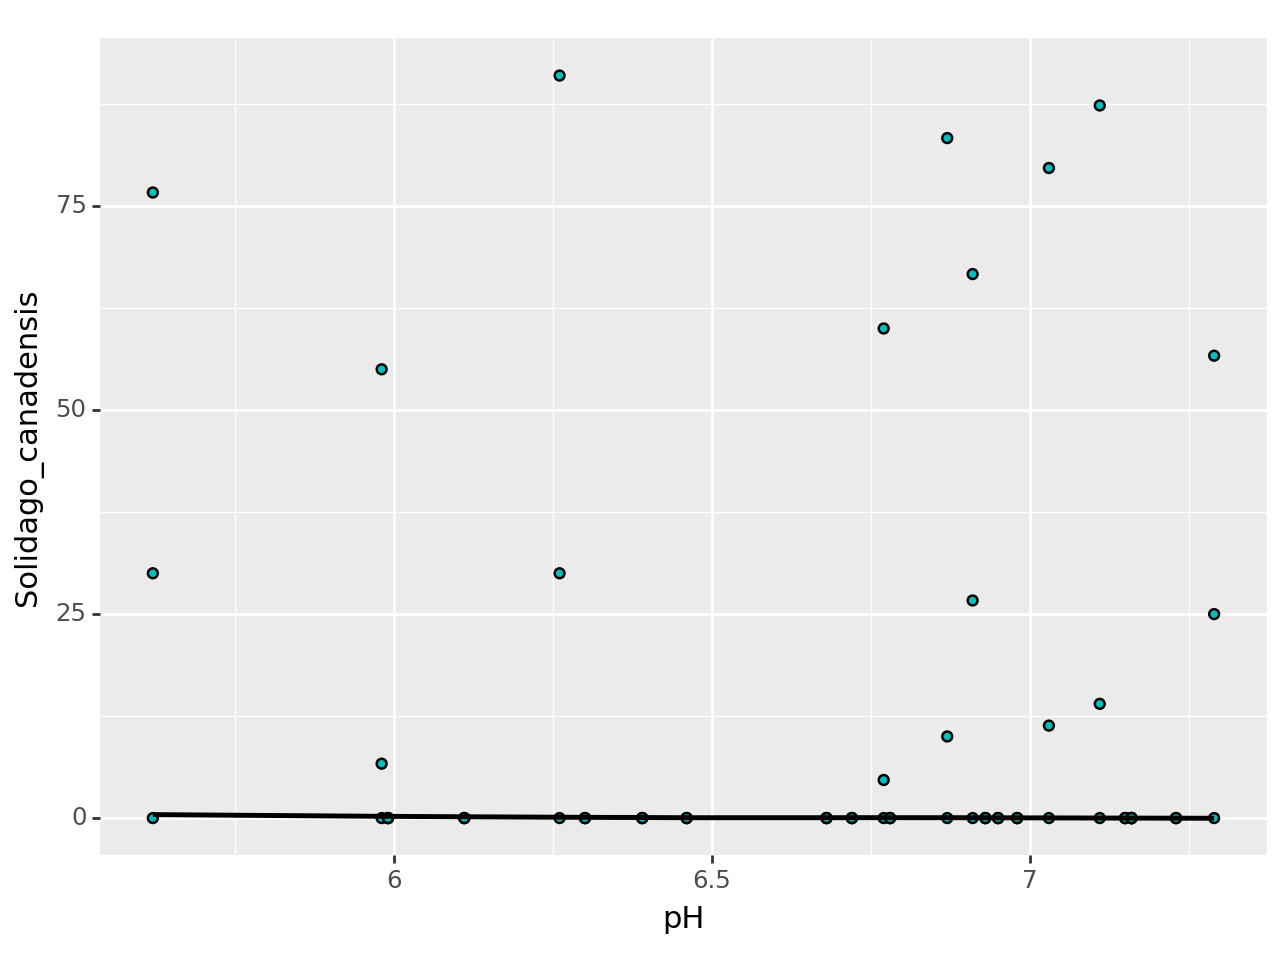

<Figure Size: (640 x 480)>

In [47]:
(
p9.ggplot(
    data = mean_df, 
    mapping = p9.aes(y = 'Solidago_canadensis', x = 'pH')
) + 
    p9.geom_point(fill='c')
    +p9.geom_smooth(fill='m')
)

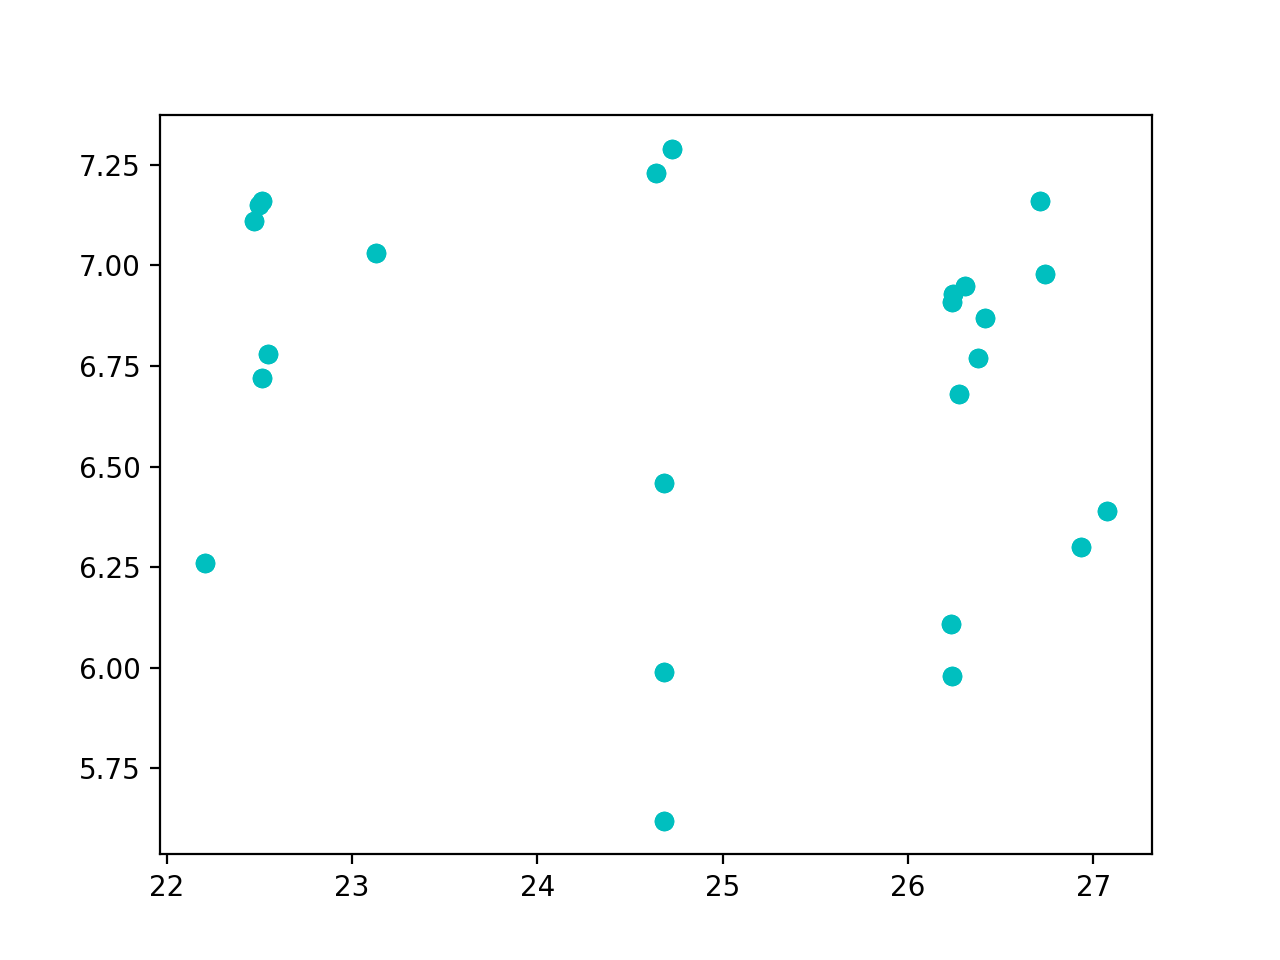

In [48]:
plt.plot(coord_new.lon,mean_df.pH,'co')
plt.show()

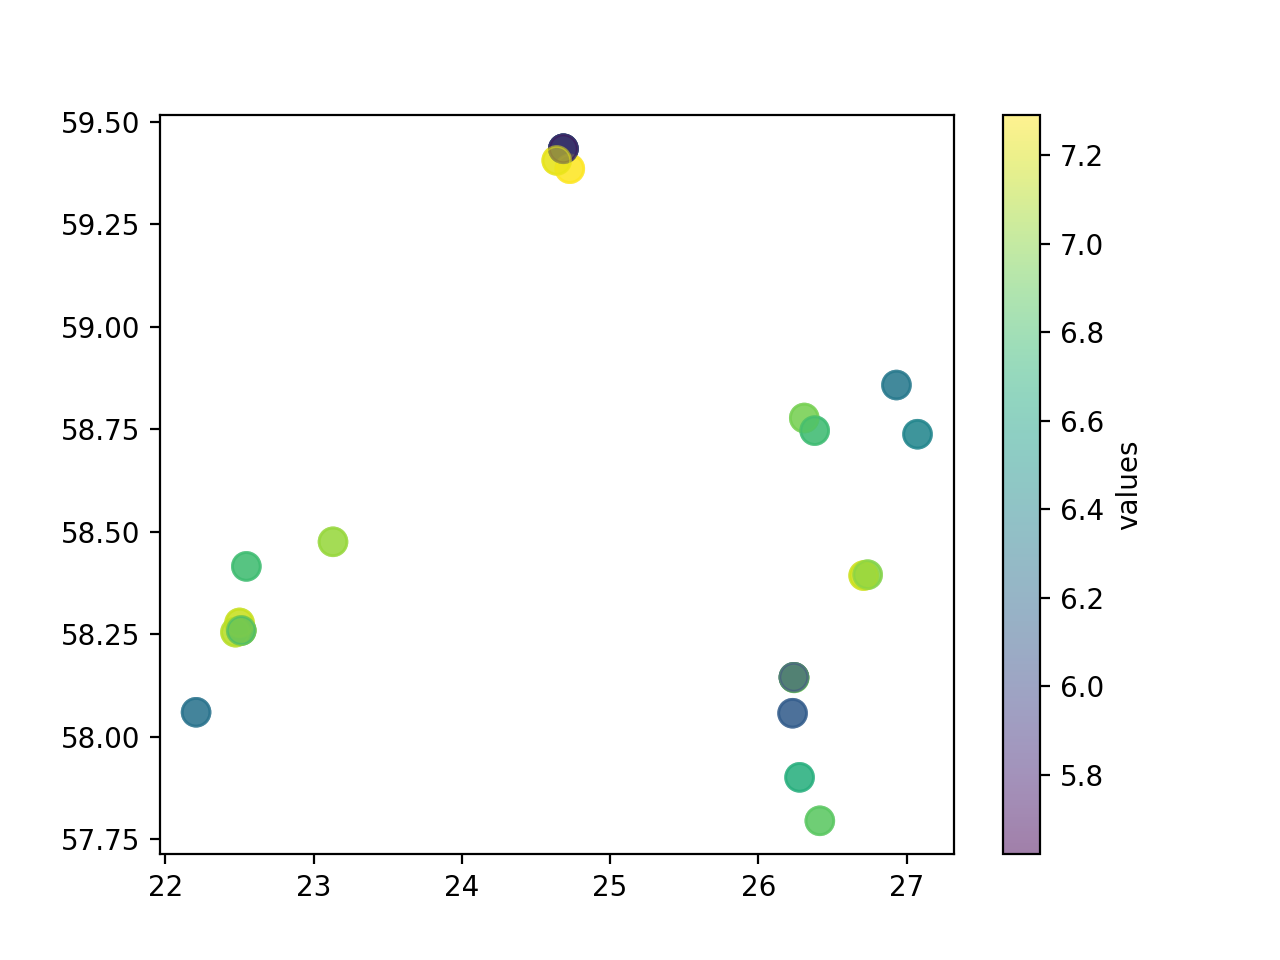

In [49]:
plt.scatter(coord_new.lon,coord_new.lat,c=mean_df.pH, cmap='viridis',s=100, alpha=0.5)
plt.colorbar(label='values')
plt.show()

In [50]:
mean_df.columns

Index(['Reynoutria_japonica', 'Solidago_canadensis', 'Aegopodium_podagraria',
       'Ranunculus_auricomus', 'Alopecurus_pratensis', 'Elymus_repens',
       'Agrostis_capillaris', 'Festuca_rubra', 'Cirsium_arvensis',
       'Taraxacum_officinale',
       ...
       'Allium_scorodoprasum', 'Veronica_teucrium', 'Agrimonia_eupatoria',
       'Plantago_media', 'Sonchus_arvensis', 'Prunus_domestica', 'Salix_alba',
       'liigirikkus', 'pH', 'invadeeritus'],
      dtype='object', length=224)

In [51]:
suur_tabel

,Reynoutria_japonica,Solidago_canadensis,Aegopodium_podagraria,Ranunculus_auricomus,Alopecurus_pratensis,Elymus_repens,Agrostis_capillaris,Festuca_rubra,Cirsium_arvensis,Taraxacum_officinale,...,pH,invadeeritus,lat,lon,P_AL,K_AL,Ca_AL,Mg_AL,N_Kjel,C_Tjur
INV-1-R,86.666667,0.000000,18.333333,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,...,6.30,1.0,58.858114,26.931854,3.324208,159.170903,2712.749316,143.1,0.259012,3.017905
INV-1-S,0.000000,0.000000,10.666667,0.000000,0.000000,0.166667,0.000000,16.666667,0.0,0.000000,...,6.95,1.0,58.777722,26.309980,30.739205,216.882166,44218.101976,902.0,1.333638,15.982513
INV-10-R,71.666667,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,...,7.15,1.0,58.278045,22.500830,36.522430,463.477570,59519.650655,1472.0,0.227349,4.500892
INV-10-S,0.000000,87.333333,0.000000,0.000000,0.000000,0.666667,0.000000,0.333333,0.0,0.000000,...,7.11,1.0,58.255485,22.473204,64.330958,400.039588,46205.463183,1434.0,0.263493,3.926866
INV-11-R,91.666667,0.000000,2.666667,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.333333,...,7.16,1.0,58.259786,22.512229,39.801980,418.613861,52130.693069,2268.0,0.289306,4.733100
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TRANS-7-S,0.000000,25.000000,0.000000,0.000000,0.000000,4.333333,2.333333,5.000000,0.0,0.000000,...,7.29,2.0,59.385577,24.728316,59.810501,71.259376,12555.073036,370.0,0.100972,2.205332
TRANS-8-R,25.000000,0.000000,13.333333,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,...,6.46,2.0,59.434088,24.685018,126.319984,198.844391,2621.239291,128.7,0.192702,2.779692
TRANS-8-S,0.000000,30.000000,30.000000,1.666667,0.333333,1.666667,0.000000,0.000000,0.0,0.000000,...,5.62,2.0,59.434088,24.685018,81.850534,56.346382,1250.494267,82.8,0.188233,2.898748
TRANS-9-R,25.000000,0.000000,85.000000,0.000000,0.000000,0.333333,0.000000,0.000000,0.0,0.000000,...,7.23,2.0,59.405796,24.640119,74.281150,302.515974,44820.287540,451.5,0.220167,2.613467


# lisame suurde tabelisse soil failist asju, pH lisatud enne

In [52]:
soil.columns

Index(['ala_kood', 'Proovi nimetus', 'Nr.', 'Jrk. nr.', 'pHKCl', 'P_AL',
       'K_AL', 'Ca_AL', 'Mg_AL', 'N_Kjel', 'C_Tjur'],
      dtype='object')

In [53]:
suur_tabel

,Reynoutria_japonica,Solidago_canadensis,Aegopodium_podagraria,Ranunculus_auricomus,Alopecurus_pratensis,Elymus_repens,Agrostis_capillaris,Festuca_rubra,Cirsium_arvensis,Taraxacum_officinale,...,pH,invadeeritus,lat,lon,P_AL,K_AL,Ca_AL,Mg_AL,N_Kjel,C_Tjur
INV-1-R,86.666667,0.000000,18.333333,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,...,6.30,1.0,58.858114,26.931854,3.324208,159.170903,2712.749316,143.1,0.259012,3.017905
INV-1-S,0.000000,0.000000,10.666667,0.000000,0.000000,0.166667,0.000000,16.666667,0.0,0.000000,...,6.95,1.0,58.777722,26.309980,30.739205,216.882166,44218.101976,902.0,1.333638,15.982513
INV-10-R,71.666667,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,...,7.15,1.0,58.278045,22.500830,36.522430,463.477570,59519.650655,1472.0,0.227349,4.500892
INV-10-S,0.000000,87.333333,0.000000,0.000000,0.000000,0.666667,0.000000,0.333333,0.0,0.000000,...,7.11,1.0,58.255485,22.473204,64.330958,400.039588,46205.463183,1434.0,0.263493,3.926866
INV-11-R,91.666667,0.000000,2.666667,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.333333,...,7.16,1.0,58.259786,22.512229,39.801980,418.613861,52130.693069,2268.0,0.289306,4.733100
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TRANS-7-S,0.000000,25.000000,0.000000,0.000000,0.000000,4.333333,2.333333,5.000000,0.0,0.000000,...,7.29,2.0,59.385577,24.728316,59.810501,71.259376,12555.073036,370.0,0.100972,2.205332
TRANS-8-R,25.000000,0.000000,13.333333,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,...,6.46,2.0,59.434088,24.685018,126.319984,198.844391,2621.239291,128.7,0.192702,2.779692
TRANS-8-S,0.000000,30.000000,30.000000,1.666667,0.333333,1.666667,0.000000,0.000000,0.0,0.000000,...,5.62,2.0,59.434088,24.685018,81.850534,56.346382,1250.494267,82.8,0.188233,2.898748
TRANS-9-R,25.000000,0.000000,85.000000,0.000000,0.000000,0.333333,0.000000,0.000000,0.0,0.000000,...,7.23,2.0,59.405796,24.640119,74.281150,302.515974,44820.287540,451.5,0.220167,2.613467


In [54]:
suur_tabel.columns

Index(['Reynoutria_japonica', 'Solidago_canadensis', 'Aegopodium_podagraria',
       'Ranunculus_auricomus', 'Alopecurus_pratensis', 'Elymus_repens',
       'Agrostis_capillaris', 'Festuca_rubra', 'Cirsium_arvensis',
       'Taraxacum_officinale',
       ...
       'pH', 'invadeeritus', 'lat', 'lon', 'P_AL', 'K_AL', 'Ca_AL', 'Mg_AL',
       'N_Kjel', 'C_Tjur'],
      dtype='object', length=232)

In [55]:
suur_tabel

,Reynoutria_japonica,Solidago_canadensis,Aegopodium_podagraria,Ranunculus_auricomus,Alopecurus_pratensis,Elymus_repens,Agrostis_capillaris,Festuca_rubra,Cirsium_arvensis,Taraxacum_officinale,...,pH,invadeeritus,lat,lon,P_AL,K_AL,Ca_AL,Mg_AL,N_Kjel,C_Tjur
INV-1-R,86.666667,0.000000,18.333333,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,...,6.30,1.0,58.858114,26.931854,3.324208,159.170903,2712.749316,143.1,0.259012,3.017905
INV-1-S,0.000000,0.000000,10.666667,0.000000,0.000000,0.166667,0.000000,16.666667,0.0,0.000000,...,6.95,1.0,58.777722,26.309980,30.739205,216.882166,44218.101976,902.0,1.333638,15.982513
INV-10-R,71.666667,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,...,7.15,1.0,58.278045,22.500830,36.522430,463.477570,59519.650655,1472.0,0.227349,4.500892
INV-10-S,0.000000,87.333333,0.000000,0.000000,0.000000,0.666667,0.000000,0.333333,0.0,0.000000,...,7.11,1.0,58.255485,22.473204,64.330958,400.039588,46205.463183,1434.0,0.263493,3.926866
INV-11-R,91.666667,0.000000,2.666667,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.333333,...,7.16,1.0,58.259786,22.512229,39.801980,418.613861,52130.693069,2268.0,0.289306,4.733100
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TRANS-7-S,0.000000,25.000000,0.000000,0.000000,0.000000,4.333333,2.333333,5.000000,0.0,0.000000,...,7.29,2.0,59.385577,24.728316,59.810501,71.259376,12555.073036,370.0,0.100972,2.205332
TRANS-8-R,25.000000,0.000000,13.333333,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,...,6.46,2.0,59.434088,24.685018,126.319984,198.844391,2621.239291,128.7,0.192702,2.779692
TRANS-8-S,0.000000,30.000000,30.000000,1.666667,0.333333,1.666667,0.000000,0.000000,0.0,0.000000,...,5.62,2.0,59.434088,24.685018,81.850534,56.346382,1250.494267,82.8,0.188233,2.898748
TRANS-9-R,25.000000,0.000000,85.000000,0.000000,0.000000,0.333333,0.000000,0.000000,0.0,0.000000,...,7.23,2.0,59.405796,24.640119,74.281150,302.515974,44820.287540,451.5,0.220167,2.613467


## suure tabeliga

In [56]:
mds = manifold.MDS(n_components=2, dissimilarity='precomputed',normalized_stress='auto')
emb = mds.fit_transform(dist_df)
värv=suur_tabel.Ca_AL.values

plt.scatter(emb[:, 0], emb[:, 1],c=värv, cmap='viridis')
plt.xlabel('NMDS 1')
plt.ylabel('NMDS 2')
plt.colorbar(label='values')
plt.show()
###

NameError: name 'dist_df' is not defined

In [ ]:
tulbad=['liigirikkus', 'pH', 'invadeeritus', 'lat', 'lon', 'P_AL', 'K_AL', 'Ca_AL', 'Mg_AL',
       'N_Kjel', 'C_Tjur']

In [ ]:
väiksem_asi=suur_tabel[tulbad]

In [ ]:
v_dist = pairwise_distances(väiksem_asi.values)

# Convert the distances matrix to a DataFrame for better visualization
v_dist_df = pd.DataFrame(v_dist, index=väiksem_asi.index, columns=väiksem_asi.index)
v_dist_df

In [ ]:
mds = manifold.MDS(n_components=2, dissimilarity='precomputed',normalized_stress='auto')
emb = mds.fit_transform(v_dist_df)
värv=väiksem_asi.pH.values

plt.scatter(emb[:, 0], emb[:, 1],c=värv, cmap='viridis')
plt.xlabel('NMDS 1')
plt.ylabel('NMDS 2')
plt.colorbar(label='values')
plt.show()

In [ ]:
tulbad

In [ ]:
mds = manifold.MDS(n_components=2, dissimilarity='precomputed',normalized_stress='auto')
emb = mds.fit_transform(v_dist_df)
värv=väiksem_asi.Mg_AL.values

plt.scatter(emb[:, 0], emb[:, 1],c=värv, cmap='viridis')
plt.xlabel('NMDS 1')
plt.ylabel('NMDS 2')
plt.colorbar(label='values')
plt.show()

## graafik3neeeeeeeeh

In [ ]:
väiksem_asi

In [ ]:
suur

# väiksem 

In [ ]:
#plt.figure(figsize=(10,6))
#plt.figure(dpi=110)
mds = manifold.MDS(n_components=2, dissimilarity='precomputed',normalized_stress='auto')
emb = mds.fit_transform(v_dist_df)

värv=väiksem_asi.Ca_AL.values

plt.scatter(emb[:, 0], emb[:, 1],c=värv, cmap='RdYlGn',s=75,alpha=0.8)
plt.xlabel('NMDS 1')
plt.ylabel('NMDS 2')
plt.title('Ca alloy')
plt.colorbar(label='Ca alloys (mg/kg)')
#plt.savefig('skeem.pdf',dpi=300,bbox_inches='tight')
plt.show()

##

#from matplotlib import pyplot as pyplot

mds = manifold.MDS(n_components=2, dissimilarity='precomputed',normalized_stress='auto')
emb = mds.fit_transform(v_dist_df)
värv=väiksem_asi.K_AL.values

plt.scatter(emb[:, 0], emb[:, 1],c=värv, cmap='viridis')
plt.xlabel('NMDS 1')
plt.ylabel('NMDS 2')
plt.colorbar(label='values')
plt.show()

In [ ]:
inv=väiksem_asi[väiksem_asi.invadeeritus==1]
trans=väiksem_asi[väiksem_asi.invadeeritus==2]
nat=väiksem_asi[väiksem_asi.invadeeritus==3]
nat

In [ ]:
plt.plot( väiksem_asi.invadeeritus, väiksem_asi.liigirikkus,'co')
plt.plot(1,inv.liigirikkus.mean(),'k+',label='inv keskmine')
plt.plot(2,trans.liigirikkus.mean(),'m+',label='trans keskmine')
plt.plot(3,nat.liigirikkus.mean(),'g+',label='nat keskmine')
plt.title('Liigirikkuse sõltuvus invadeeritusest')
plt.ylabel('liigirikkus')
plt.xlabel('invadeeritus')
plt.xticks( np.arange(1, 4, 1) )
plt.legend()
plt.show()

# graafik 1

In [ ]:
import seaborn as sns
plt.figure(figsize=(10,6))
inv_vs_rich=sns.violinplot(x='invadeeritus', y='liigirikkus', data=väiksem_asi)
#plt.plot(1,inv.liigirikkus.mean(),'k+',label='inv keskmine')
#plt.plot(2,trans.liigirikkus.mean(),'m+',label='trans keskmine')
#plt.plot(3,nat.liigirikkus.mean(),'g+',label='nat keskmine')
plt.title('Effect of invadedness on species richness')
plt.ylabel('Species richness')
plt.xlabel('Level of invadedness')
plt.xticks(np.arange(3),["Natural","Transitional","Invaded"])
#plt.legend()
plt.show()


fig =inv_vs_rich.get_figure()
fig.savefig('inv_vs_rich.png',dpi=300)  



In [ ]:
väiksem_asi.columns

In [ ]:
taimed

In [ ]:
suur_tabel[['invadeeritus','lat','lon']]
tulbad

In [ ]:
species_cols = [col for col in suur_tabel.columns if col not in ['liigirikkus',
 'pH',
 'invadeeritus',
 'lat',
 'lon',
 'P_AL',
 'K_AL',
 'Ca_AL',
 'Mg_AL',
 'N_Kjel',
 'C_Tjur']]

mean_coverage_by_area = suur_tabel.groupby('invadeeritus')[species_cols].mean()

# Plot the mean coverage for each species in each AreaType
plt.figure(figsize=(20, 10))
sns.heatmap(mean_coverage_by_area, cmap='YlGnBu')
plt.title('Mean Coverage of Each Species in Each AreaType')
plt.ylabel('AreaType')
plt.xlabel('Species')
plt.show()

In [ ]:
#soil_cols = ['P_AL', 'K_AL', 'Ca_AL', 'Mg_AL', 'N_Kjel', 'C_Tjur']
soil_cols = ['P_AL', 'K_AL', 'Ca_AL', 'Mg_AL']

# Calculate the mean of each soil composition element in each AreaType
mean_soil_by_area = väiksem_asi.groupby('liigirikkus')[soil_cols].mean()

# Plot the mean for each soil composition element in each AreaType
mean_soil_by_area.plot(kind='bar', stacked=True)
plt.ylabel('Mean Composition')
plt.xlabel('liigirikkus')
plt.show()

In [ ]:
m = folium.Map(location=[58.5953, 25.0136], zoom_start=7)  # coordinates for Estonia

# Add a marker for each location
for idx, row in väiksem_asi.iterrows():
    # The color of the marker is determined by species richness
    folium.CircleMarker(
        location=[row['lat'], row['lon']],
        radius=5,
        color=plt.cm.viridis(row['liigirikkus'] / väiksem_asi['liigirikkus'].max()),
        fill=True,
    ).add_to(m)

# Display the map
m

In [ ]:
suur=suur_tabel.copy()

suur.loc[:, 'invasive_cover'] = invasive_cover.values
suur.loc[:, 'native_cover'] = native_cover.values
suur.loc[:, 'full_plant_cover'] = full_plant_cover.values



suur_k = pairwise_distances(suur.values)

# Convert the distances matrix to a DataFrame for better visualization
suur_d = pd.DataFrame(suur_k, index=suur.index, columns=suur.index)
suur_d

In [ ]:
suur

# GRAAFIK

In [ ]:
suur

# suur tabel

In [ ]:
import matplotlib.pylab as pylab

params = {
    'legend.fontsize': 'x-large',
    'figure.figsize': (10, 6),
    'axes.labelsize': 'x-large',
    'axes.titlesize':'x-large',
    'xtick.labelsize':'x-large',
    'ytick.labelsize':'x-large'
}

pylab.rcParams.update(params)

In [ ]:
väiksem_asi = väiksem_asi.copy()
väiksem_asi.loc[:, 'invasive_cover'] = invasive_cover.values
väiksem_asi.loc[:, 'native_cover'] = native_cover.values
väiksem_asi.loc[:, 'full_plant_cover'] = full_plant_cover.values

In [ ]:
# Compute the correlation matrix
corr = väiksem_asi.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

plt.show()

In [ ]:
väiksem_asi

In [ ]:
from sklearn.cluster import KMeans
import pandas as pd

# Assuming df is your DataFrame and it's already loaded
# df = pd.read_csv('your_file.csv')

# Select the columns to use for clustering
# In this case, let's use soil composition and species richness
selected_columns = ['P_AL', 'K_AL', 'Ca_AL', 'Mg_AL', 'N_Kjel', 'C_Tjur', 'liigirikkus']
data_for_clustering = väiksem_asi[selected_columns]

# Create a KMeans object
kmeans = KMeans(n_clusters=3)  # choose the number of clusters

# Fit the KMeans object to the data
kmeans.fit(data_for_clustering)

# Get the cluster assignments for each data point
clusters = kmeans.labels_

# Add the cluster assignments to the original DataFrame
väiksem_asi['cluster'] = clusters

In [ ]:
väiksem_asi

In [ ]:
plt.figure(figsize=(10, 10))
plt.scatter(väiksem_asi['invasive_cover'], väiksem_asi['native_cover'], c=väiksem_asi['cluster'])
plt.title('Clusters')
#plt.xlabel('Longitude')
#plt.ylabel('Latitude')
plt.colorbar()
plt.show()

In [ ]:
(
p9.ggplot(
    data = väiksem_asi, 
    mapping = p9.aes(y = 'invasive_cover', x = 'native_cover')
) + 
    p9.geom_point(fill='c')
    +p9.geom_smooth(fill='m')
)

In [ ]:
plt.plot(väiksem_asi.invasive_cover,väiksem_asi.native_cover,'co')
plt.show()

In [ ]:
from scipy.stats import linregress

X=väiksem_asi.invasive_cover
Y=väiksem_asi.native_cover

# sobitame sirge
a, b, _, _, ua = linregress(X, Y)
Y1 = a * X + b
s = np.sqrt( ((Y - a * X - b)**2).sum() / (len(X) - 2) )
ub = np.sqrt( s**2 / len(X) + (X.mean() * ua)**2 )

# tulemuste väljatrükk
print( 'a = %.2f ± %.2f' % (a, ua) )
print( 'b = %.2f ± %.2f' % (b, ub) )
print( 's = %.2f' % s )

# graafik
plt.plot(X, Y, 'bo')
plt.plot(X, Y1, 'r-')
plt.title('invasiivne vs tavaline katvus korr')
plt.grid()
plt.show()

In [ ]:
a, b = np.polyfit(X, Y, 1)
Y1 = a * X + b
plt.plot(X, Y, 'bo')
plt.plot(X, Y1, 'r-')

plt.grid()
plt.show()
print(a,b)

In [ ]:
from scipy.spatial import distance
# Convert the distances matrix to a DataFrame for better visualization
#distances_mat = pd.DataFrame(distances)

#distances_mat
plants_only=mean_df.drop(labels=["liigirikkus","pH","invadeeritus"], axis=1)

maatriks_viis= pd.ExcelFile('maatriks_viis.xlsx')
maatriks_viis= maatriks_viis.parse('Sheet5')
#maatriks_viis= maatriks_viis.iloc[1:,1]
print(maatriks_viis)

maatriks= pd.ExcelFile('maatriks.xlsx')
YSI= maatriks.parse('Sheet4')

print(YSI)


In [ ]:
YSI['invasiivsus'] = YSI['invasiivsus'].apply(lambda x: 0 if x == 1 else 1)

In [ ]:
YSI

In [ ]:
com=plants_only
com

In [ ]:
com=plants_only.values
#com=np.array(com)
pl=plants_only.T

#com = np.array(com).T
#com = com / np.sum(com, axis=1)[:, np.newaxis]

distance = pairwise_distances(pl.values)

rpi = pd.DataFrame(YSI) #/ np.max(YSI, axis=0)

distances_mat = pd.DataFrame(distance)
#t_dist=np.reshape(distances_mat.values,(1,-1))
#cij = 1 - (pairwise_distances(np.reshape(rpi.values,(1, -1)), metric="correlation"))
t_dist=np.reshape(distances_mat.values,(1,-1))
#cij = 1 - (pairwise_distances(rpi, metric="correlation"))
r = YSI['invasiivsus'].values
n = len(r)
c_ij = np.zeros((n, n))

for i in range(n):
    for j in range(n):
        #if i != j:
        c_ij[i, j] = 1 - min(r[i], r[j])

# Convert the resulting matrix to a DataFrame if needed
df_c_ij = pd.DataFrame(c_ij)

dxc = distances_mat *c_ij

#s = com.shape[0]
#BNI = 0

#for i in range(s-1):
    #for j in range(i+1, s-1):
        #BNI += com[i, j] * dxc.iloc[i, j]

#print("BNI =", BNI)

#BNI=np.dot(com,dxc)
BNI = np.apply_along_axis(lambda x: np.dot(x, np.dot(dxc, x)), axis=1, arr=com)/2 
#RaoQ = np.apply_along_axis(lambda x: np.dot(x, np.dot(t_dist, x)), axis=1, arr=com) / 2
#BNIs = BNI / RaoQ

In [ ]:
BNI

In [ ]:
BNI_norm=BNI/BNI.max() #normeerin
plt.plot(BNI_norm, väiksem_asi['liigirikkus'],'co')
plt.show()

In [ ]:
com.shape

In [ ]:
com.shape

In [ ]:
dxc.shape

In [ ]:
dxc